# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [60]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

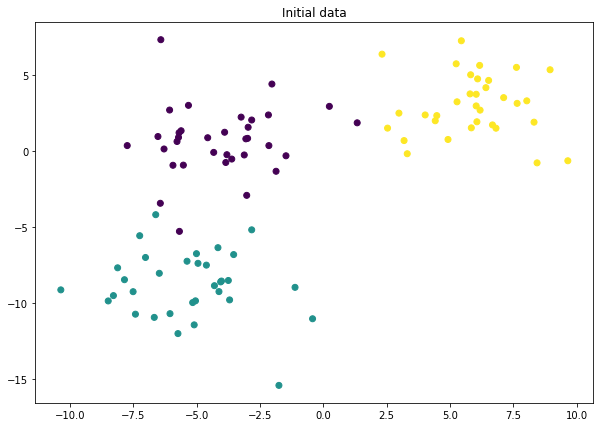

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data');

In [62]:
def calc_distance(X, Y):
    distance = 0
    for i in range(len(X)):
        distance += (X[i] - Y[i])**2
    return np.sqrt(distance)

In [27]:
dictionary = {}
dictionary[(1,1)] = [25, 0]
dictionary[(1,2)] = [50, 0]
dictionary[(1,3)] = [40, 1]
dictionary

In [58]:
import operator
sorted_x = sorted(dictionary.values(), key=operator.itemgetter(0))
print(sorted_x[:k])
groups = groupby(sorted_x, key=operator.itemgetter(1))
print(groups)

[[25, 0], [40, 1], [50, 0]]


NameError: name 'groupby' is not defined

In [18]:
def knn(x_train, y_train, x_test, k):
    predict_df = pd.DataFrame()
    predict_df.columns = ['Train', 'Test', 'Distance', 'Class', 'pred_class']
    for test in x_test:
        for ind, train in enumerate(x_train):
            precict_df.iloc[ind] = [train, test, calc_distance(train, test), x_test[ind], None]
        class_counts = (neighs.sort_values(['dist'])[:k])['class'].value_counts()
        target = np.random.choice(class_counts[class_counts == class_counts.max()].index)
        
        y_test.append(int(target))    
    return np.array(y_test)
#     sortdist = sorted(distances.items(), key=operator.itemgetter(1))
#     neighbors = []
#     for x in range(k):
#         neighbors.append(sortdist[x][0])
#     Count = {}  # to get most frequent class of rows
#     for x in range(len(neighbors)):
#         response = trainingSet.iloc[neighbors[x]][-1]
#         if response in Count:
#             Count[response] += 1
#         else:
#             Count[response] = 1
#     sortcount = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
#     return (sortcount[0][0], neighbors)

In [19]:
def funct_kNN(x_train, y_train, y_test, k):
    
    return y_test

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [20]:
h = 0.5
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [23]:
results = knn(X, Y, np.vstack((xx.ravel(), yy.ravel())).T, k=3)

In [24]:
print(results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [59]:
print(x_min, x_max, y_min, y_max)
print(np.arange(x_min, x_max, h))

-11.365836517592687 10.650260182123205 -16.441854394619032 8.302049901911769
[-11.36583652 -10.86583652 -10.36583652  -9.86583652  -9.36583652
  -8.86583652  -8.36583652  -7.86583652  -7.36583652  -6.86583652
  -6.36583652  -5.86583652  -5.36583652  -4.86583652  -4.36583652
  -3.86583652  -3.36583652  -2.86583652  -2.36583652  -1.86583652
  -1.36583652  -0.86583652  -0.36583652   0.13416348   0.63416348
   1.13416348   1.63416348   2.13416348   2.63416348   3.13416348
   3.63416348   4.13416348   4.63416348   5.13416348   5.63416348
   6.13416348   6.63416348   7.13416348   7.63416348   8.13416348
   8.63416348   9.13416348   9.63416348  10.13416348  10.63416348]


Постройте разделающие поверхности, которые строит классификатор

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [4]:
# code here

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.